## Multiclass Classification
### For this experiment, we will use a small subset of MNIST dataset for handwritten digits. This dataset has no missing data. You will have to implement one-versus-rest scheme to perform multi-class classification using a binary classifier based on L1 regularized logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import os
os.chdir("D:\\my 2nd\\Task 2")

## 2.1 Read and understand the data, create a default One-vs-Rest Classifier

 #### 1 Q: Used the data from the file reduced_mnist.csv

In [2]:
mn=pd.read_csv("reduced_mnist.csv")

### Number of data points
### Total number of features


In [3]:
mn.shape

(2520, 785)

### So there are 2520 rows and 785 columns in which column 1 is label and our target variable and rest 784 columns are features.

In [4]:
mn.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Unique labels in the data

In [5]:
mn.label.value_counts()

1    286
2    269
3    258
0    257
7    256
6    243
4    243
8    239
9    238
5    231
Name: label, dtype: int64

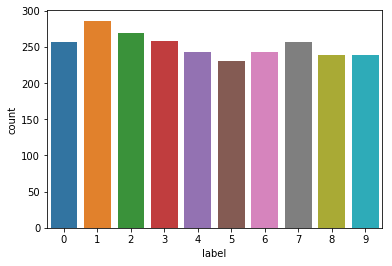

In [7]:
sns.countplot(x="label",data=mn)

## By using Count plot we can see our lalbels are balanced and There are total 10 unique lables that 0 to 9

## Check missing values in data set

In [10]:
mn.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

### In this data set has no mising values

## 2- Split the data into 70% training data and 30% test data. Fit a One-vs-Rest Classifier (which uses Logistic regression classifier with alpha=1) on training data, and report accuracy, precision, recall on testing data

In [11]:
X=mn.drop(["label"],axis=1)
y=mn["label"]

### Splitting data into train and test in ratio of 70% and 30%

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print('X_train shape ', X_train.shape)
print('X_test shape ', X_test.shape)
print('y_train shape ', y_train.shape)
print('y_test shape ', y_test.shape)

X_train shape  (1764, 784)
X_test shape  (756, 784)
y_train shape  (1764,)
y_test shape  (756,)


### Applying One-vs-Rest Logistic regression with alpha=1
### One-vs-the-rest (OvR) multiclass/multilabel strategy

In [21]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
alpha=1
model=OneVsRestClassifier(LogisticRegression(penalty='l1',C=1/alpha,solver='liblinear'))
model.fit(X_train,y_train) 

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [ ]:
#model = OneVsRestClassifier(model)
#        model.fit(X_train, y_train)

### Model Accuracy Score

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
pred=model.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('accuracy:{}'.format(accuracy))

accuracy:0.83994708994709


### Model Precision Score

In [24]:
recall=recall_score(y_test,pred,average = 'weighted')
print('Recall:{}'.format(recall))

Recall:0.83994708994709


## Model Classification Report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        84
           1       0.92      0.98      0.95        92
           2       0.87      0.76      0.81        79
           3       0.88      0.86      0.87        78
           4       0.85      0.71      0.78        73
           5       0.77      0.76      0.76        74
           6       0.87      0.92      0.90        66
           7       0.90      0.85      0.87        73
           8       0.69      0.78      0.73        73
           9       0.71      0.81      0.76        64

   micro avg       0.84      0.84      0.84       756
   macro avg       0.84      0.84      0.84       756
weighted avg       0.84      0.84      0.84       756



### Evaluation of Mode-Confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
cnf_matrix=print(confusion_matrix(y_test, pred))

[[78  1  0  0  0  2  0  0  3  0]
 [ 0 90  0  0  0  0  0  0  2  0]
 [ 2  3 60  0  1  0  2  4  4  3]
 [ 0  1  2 67  1  3  0  0  4  0]
 [ 0  1  2  1 52  0  3  1  1 12]
 [ 2  0  0  6  0 56  3  0  6  1]
 [ 0  0  2  0  3  0 61  0  0  0]
 [ 0  1  1  1  1  0  0 62  3  4]
 [ 1  1  1  1  0 10  1  0 57  1]
 [ 1  0  1  0  3  2  0  2  3 52]]


In [29]:
pip install scikitplot

Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement scikitplot (from versions: )
No matching distribution found for scikitplot


In [33]:
#ROC
#import scikitplot as skplt #to make things easy
#y_pred_proba = LR.predict_proba(X_test)
#skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
#plt.show()

In [39]:
import pylab as pl

In [46]:
labels = [0,1,2,3,4,5,6,7,8,9]
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [52]:
cm = confusion_matrix(y_test, pred)

In [53]:
cm

array([[78,  1,  0,  0,  0,  2,  0,  0,  3,  0],
       [ 0, 90,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 2,  3, 60,  0,  1,  0,  2,  4,  4,  3],
       [ 0,  1,  2, 67,  1,  3,  0,  0,  4,  0],
       [ 0,  1,  2,  1, 52,  0,  3,  1,  1, 12],
       [ 2,  0,  0,  6,  0, 56,  3,  0,  6,  1],
       [ 0,  0,  2,  0,  3,  0, 61,  0,  0,  0],
       [ 0,  1,  1,  1,  1,  0,  0, 62,  3,  4],
       [ 1,  1,  1,  1,  0, 10,  1,  0, 57,  1],
       [ 1,  0,  1,  0,  3,  2,  0,  2,  3, 52]], dtype=int64)

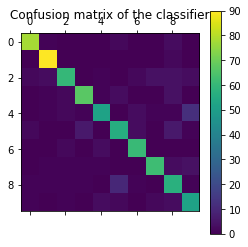

In [56]:
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

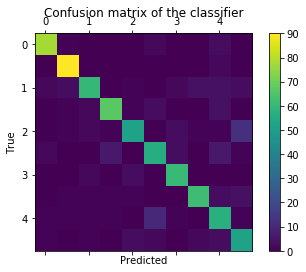

In [58]:
cm1 = confusion_matrix(y_test, pred,labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### 2.2 Choosing the best hyper-parameter (7 Marks)

1- Choose the best value of alpha from the set a={0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333} by observing average training and validation performance P. On a graph, plot both the average training performance (in red) and average validation performacne (in blue) w.r.t. each hyperparameter value. Comment on this graph by identifying regions of overfitting and underfitting. Print the best value of alpha hyperparameter

#### Aplying one-vs-rest logistic regression classifier for different values of alpha by observing average training and validation performance

In [59]:
# alpha from the set a={0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333}
alpha = [0.1, 1, 3, 10, 33, 100, 333, 1000, 3333, 10000, 33333]
C=[1 / x for x in alpha]
train_accuracy = []
test_accuracy = []
for c in C:
    int_train = []
    int_test = []
    mod2 = OneVsRestClassifier(LogisticRegression(penalty='l1', C=c, solver='liblinear'))
    mod2.fit(X_train, y_train)
    pred_train=mod2.predict(X_train)
    pred_test=mod2.predict(X_test)
    int_train.append(accuracy_score(y_train, pred_train))
    int_test.append(accuracy_score(y_test, pred_test))
    print('C:', c)
    print('Coefficient of each feature:', mod2.coef_)
    print('Training accuracy:', accuracy_score(y_train, pred_train))
    print('Test accuracy:', accuracy_score(y_test, pred_test))
    print('')
    train_accuracy.append(np.array(int_train).mean())
    test_accuracy.append(np.array(int_test).mean())

C: 10.0
Coefficient of each feature: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Training accuracy: 1.0
Test accuracy: 0.8306878306878307

C: 1.0
Coefficient of each feature: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Training accuracy: 1.0
Test accuracy: 0.8452380952380952

C: 0.3333333333333333
Coefficient of each feature: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Training accuracy: 1.0
Test accuracy: 0.8452380952380952

C: 0.1
Coefficient of each feature: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Training accuracy: 1.0
Test accuracy: 0.84

#### So We can see that our model accuracy is decreasing for training data when alpha is increasing. So here is some sign of underfitting in the model

#### Plot between training accuracy and test accuracy for choosing best alpha

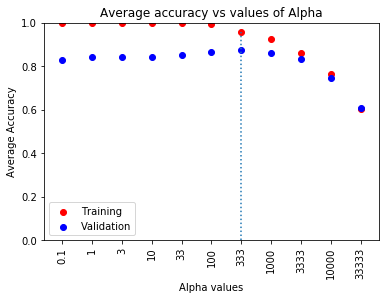

So Best value of Alpha: 333


In [61]:
#plot graph
max_index_1  = np.argmax(train_accuracy)
max_index_2  = np.argmax(test_accuracy)
best_alpha = alpha[max_index_2]

plt.scatter(range(0,len(alpha)), train_accuracy, color='r', label='Training')
plt.scatter(range(0,len(alpha)), test_accuracy, color='b', label='Validation')
plt.xticks(range(0,len(alpha)), alpha, rotation='vertical') 
#plt.plot((np.argmax(train_accuracy), np.argmax(train_accuracy)), (0, val_accuracy[max_index_1]), ls='dotted')
plt.plot((np.argmax(test_accuracy), np.argmax(test_accuracy)), (0, train_accuracy[max_index_2]), ls='dotted')
axes = plt.gca()
axes.set_ylim([0, 1.0])
plt.xlabel('Alpha values')    
plt.ylabel('Average Accuracy')
plt.title('Average accuracy vs values of Alpha')
plt.legend(loc="lower left")
plt.show()
print 
print("So Best value of Alpha: {}".format(best_alpha))

#### 2- Use the best alpha and all training data to build the final model and then evaluate the prediction performance on test data and report the following:
##### • The confusion matrix • Precision, recall and accuracy for each class.

#### Applying One-vs-rest logistic regression for best value of alpha

In [63]:
Best_alpha=333
model2=OneVsRestClassifier(LogisticRegression(penalty='l1',C=1/Best_alpha,solver='liblinear'))
model2.fit(X_train,y_train)
pred_final=model2.predict(X_test)

### Final accuracy score with best alpha

In [64]:
accuracy=accuracy_score(y_test,pred_final)
print('Final accuracy with best alpha:{}'.format(accuracy))

Final accuracy with best alpha:0.8743386243386243


## Final Precision Score with best alpha

In [65]:
precision=precision_score(y_test,pred_final,average = 'weighted')
print('final_precision score with best alpha:{}'.format(precision))

final_precision score with best alpha:0.873447184706973


### Final Recall Score

In [66]:
Final_recall=recall_score(y_test,pred_final,average = 'weighted')
print('Final Recall score with best alpha:{}'.format(Final_recall))

Final Recall score with best alpha:0.8743386243386243


### Classification report
#### For each class precision, recall and f1-score

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_final))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        84
           1       0.91      0.98      0.94        92
           2       0.86      0.80      0.83        79
           3       0.88      0.87      0.88        78
           4       0.86      0.82      0.84        73
           5       0.83      0.74      0.79        74
           6       0.90      0.92      0.91        66
           7       0.88      0.92      0.90        73
           8       0.82      0.84      0.83        73
           9       0.82      0.86      0.84        64

   micro avg       0.87      0.87      0.87       756
   macro avg       0.87      0.87      0.87       756
weighted avg       0.87      0.87      0.87       756



### Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_final))

[[81  1  0  0  0  1  0  0  1  0]
 [ 0 90  0  0  0  0  0  0  2  0]
 [ 1  3 63  1  1  0  3  4  3  0]
 [ 0  1  3 68  1  4  0  0  1  0]
 [ 0  1  1  1 60  0  2  1  0  7]
 [ 2  0  2  5  1 55  2  0  5  2]
 [ 1  0  1  0  3  0 61  0  0  0]
 [ 0  1  1  1  0  0  0 67  1  2]
 [ 0  2  2  1  1  5  0  0 61  1]
 [ 1  0  0  0  3  1  0  4  0 55]]


In [69]:
confm = confusion_matrix(y_test, pred_final)

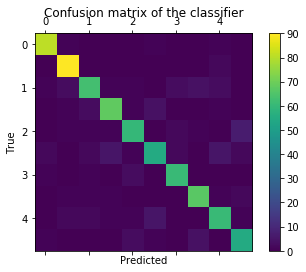

In [70]:
confm = confusion_matrix(y_test, pred_final,labels)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Q3:Discuss if there is any sign of underfitting or overfitting with appropriate reasoning

#### Overfitting means that our trained model is not generalizing enough. Our model can give us excellent predictions for our training data, but can give us poor predictions for any data never seen before during training.

#### Underfitting is the opposite. Our model is generalizing too much to the point that it gives poor predictions even if you used our training data.

#### The trick is to balance between them. We need to generate a model that gives good results when we use our training data and also gives good predictions for any data never seen before during training.

## As our model accuracy is good for test data so there is no sign of underfitting and overfitting